In [1]:
import pandas as pd
from pandas import DataFrame, Series, Index
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import sqlite3
import numpy as np
import matplotlib.ticker as mtick

matplotlib.rcParams["font.size"] = 16
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.family'] = 'Calibri'

crash = pd.read_csv("ProcessedData.csv")
conn = sqlite3.connect('crash.db')
crash.to_sql("crash", conn, if_exists="replace", index=False)

def qry(sql):
    return pd.read_sql(sql, conn)

d:\搜狗高速下载\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
SINJSVR_AGE_0 = qry ("""
SELECT INJSVR, count() as "0-25"
FROM crash
WHERE ((AGE1>0 and AGE1<25) or (AGE2>0 and AGE2<25)) 
GROUP BY INJSVR
""")

SINJSVR_AGE_25 = qry ("""
SELECT INJSVR, count() as "25-35"
FROM crash
WHERE (((AGE1>25 and AGE1<35) or (AGE1 = 25)) or ((AGE2>25 and AGE2<35) or (AGE2 = 25))) 
GROUP BY INJSVR
""")

SINJSVR_AGE_35 = qry ("""
SELECT INJSVR, count() as "35-45"
FROM crash
WHERE (((AGE1>35 and AGE1<45) or  (AGE1 = 35)) or ((AGE2>35 and AGE2<45) or (AGE2 = 35))) 
GROUP BY INJSVR
""")

SINJSVR_AGE_45 = qry ("""
SELECT INJSVR, count() as "45-55"
FROM crash
WHERE (((AGE1>45 and AGE1<55) or  (AGE1 = 45)) or ((AGE2>45 and AGE2<55) or (AGE2 = 45))) 
GROUP BY INJSVR
""")

SINJSVR_AGE_55 = qry ("""
SELECT INJSVR, count() as "55-65"
FROM crash
WHERE (((AGE1>55 and AGE1<65) or  (AGE1 = 55)) or ((AGE2>55 and AGE2<65) or (AGE2 = 55))) 
GROUP BY INJSVR
""")

SINJSVR_AGE_65 = qry ("""
SELECT INJSVR, count() as ">65"
FROM crash
WHERE (((AGE1>65) or  (AGE1 = 65)) or ((AGE2>65) or (AGE2 = 65))) 
GROUP BY INJSVR
""")

SINJSVR_AGE = pd.concat([SINJSVR_AGE_0, SINJSVR_AGE_25["25-35"], SINJSVR_AGE_35["35-45"], SINJSVR_AGE_45["45-55"], SINJSVR_AGE_55["55-65"], SINJSVR_AGE_65[">65"]], axis = 1)
SINJSVR_AGE_T = SINJSVR_AGE.set_index("INJSVR").transpose()
SINJSVR_AGE_SemiFinal = SINJSVR_AGE_T.drop(columns=[None,'C'])
SINJSVR_AGE_SemiFinal_T = SINJSVR_AGE_SemiFinal.transpose()

In [3]:
ISNULL_alo = crash["ALCFLAG"].isnull()
crash["ALCFLAG"].fillna("N",inplace=True)

INJSVR_AGE_0 = qry ("""
SELECT INJSVR, count() as "0-25"
FROM crash
WHERE ((AGE1>0 and AGE1<25) or (AGE2>0 and AGE2<25)) and ALCFLAG="Y"
GROUP BY INJSVR
""")

INJSVR_AGE_25 = qry ("""
SELECT INJSVR, count() as "25-35"
FROM crash
WHERE (((AGE1>25 and AGE1<35) or (AGE1 = 25)) or ((AGE2>25 and AGE2<35) or (AGE2 = 25))) and ALCFLAG="Y"
GROUP BY INJSVR
""")

INJSVR_AGE_35 = qry ("""
SELECT INJSVR, count() as "35-45"
FROM crash
WHERE (((AGE1>35 and AGE1<45) or  (AGE1 = 35)) or ((AGE2>35 and AGE2<45) or (AGE2 = 35))) and ALCFLAG="Y"
GROUP BY INJSVR
""")

INJSVR_AGE_45 = qry ("""
SELECT INJSVR, count() as "45-55"
FROM crash
WHERE (((AGE1>45 and AGE1<55) or  (AGE1 = 45)) or ((AGE2>45 and AGE2<55) or (AGE2 = 45))) and ALCFLAG="Y"
GROUP BY INJSVR
""")

INJSVR_AGE_55 = qry ("""
SELECT INJSVR, count() as "55-65"
FROM crash
WHERE (((AGE1>55 and AGE1<65) or  (AGE1 = 55)) or ((AGE2>55 and AGE2<65) or (AGE2 = 55))) and ALCFLAG="Y"
GROUP BY INJSVR
""")

INJSVR_AGE_65 = qry ("""
SELECT INJSVR, count() as ">65"
FROM crash
WHERE (((AGE1>65) or  (AGE1 = 65)) or ((AGE2>65) or (AGE2 = 65))) and ALCFLAG="Y"
GROUP BY INJSVR
""")

INJSVR_AGE = pd.concat([INJSVR_AGE_0, INJSVR_AGE_25["25-35"], INJSVR_AGE_35["35-45"], INJSVR_AGE_45["45-55"], INJSVR_AGE_55["55-65"], INJSVR_AGE_65[">65"]], axis = 1)
INJSVR_AGE_T = INJSVR_AGE.set_index("INJSVR").transpose()
INJSVR_AGE_SemiFinal = INJSVR_AGE_T.drop(columns=[None,'C'])
INJSVR_AGE_SemiFinal_T = INJSVR_AGE_SemiFinal.transpose()
INJSVR_AGE_SemiFinal_T["55-65"]["K"]=0
INJSVR_AGE_SemiFinal_T[">65"]=0
INJSVR_AGE_SemiFinal_T

,0-25,25-35,35-45,45-55,55-65,>65
INJSVR,,,,,,
A,145,119,92,74,25,0
B,441,398,248,154,64,0
K,40,36,19,22,0,0


In [4]:
sum1 = INJSVR_AGE_SemiFinal_T["0-25"].sum()
sum2 = INJSVR_AGE_SemiFinal_T["25-35"].sum()
sum3 = INJSVR_AGE_SemiFinal_T["35-45"].sum()
sum4 = INJSVR_AGE_SemiFinal_T["45-55"].sum()
sum5 = INJSVR_AGE_SemiFinal_T["55-65"].sum()
sum6 = INJSVR_AGE_SemiFinal_T[">65"].sum()

INJSVR_AGE_SemiFinal_T_SUM = INJSVR_AGE_SemiFinal_T.replace([INJSVR_AGE_SemiFinal_T["0-25"]["A"],INJSVR_AGE_SemiFinal_T["0-25"]["B"],INJSVR_AGE_SemiFinal_T["0-25"]["K"],INJSVR_AGE_SemiFinal_T["25-35"]["A"], INJSVR_AGE_SemiFinal_T["25-35"]["B"],INJSVR_AGE_SemiFinal_T["25-35"]["K"],INJSVR_AGE_SemiFinal_T["35-45"]["A"],INJSVR_AGE_SemiFinal_T["35-45"]["B"],INJSVR_AGE_SemiFinal_T["35-45"]["K"],INJSVR_AGE_SemiFinal_T["45-55"]["A"],INJSVR_AGE_SemiFinal_T["45-55"]["B"],INJSVR_AGE_SemiFinal_T["45-55"]["K"],INJSVR_AGE_SemiFinal_T["55-65"]["A"],INJSVR_AGE_SemiFinal_T["55-65"]["B"],INJSVR_AGE_SemiFinal_T["55-65"]["K"],INJSVR_AGE_SemiFinal_T[">65"]["A"],INJSVR_AGE_SemiFinal_T[">65"]["B"],INJSVR_AGE_SemiFinal_T[">65"]["K"]], 
                               [sum1, sum1, sum1, sum2, sum2, sum2, sum3, sum3, sum3, sum4, sum4, sum4, sum5, sum5, sum5, sum6, sum6, sum6])

INJSVR_AGE_SemiFinal_T_SUM["0-25"]["K"]=626.0
INJSVR_AGE_SemiFinal_T_SUM["25-35"]["K"]=553.0
INJSVR_AGE_SemiFinal_T_SUM["35-45"]["A"]=359.0
INJSVR_AGE_SemiFinal_T_SUM["35-45"]["K"]=359.0
INJSVR_AGE_SemiFinal_T_SUM["55-65"]["A"]=89.0
INJSVR_AGE_SemiFinal_T_SUM["55-65"]["K"]=89.0

INJSVR_AGE_SemiFinal_T_SUM

,0-25,25-35,35-45,45-55,55-65,>65
INJSVR,,,,,,
A,626,553,359,250,89,0
B,626,553,359,250,89,0
K,626,553,359,250,89,0


In [5]:
INJSVR_AGE_SemiFinal_T_PERCENT = INJSVR_AGE_SemiFinal_T*100/INJSVR_AGE_SemiFinal_T_SUM
INJSVR_AGE_SemiFinal_T_PERCENT["55-65"]["K"]=0.0
INJSVR_AGE_SemiFinal_T_PERCENT[">65"]["A"]=0.0
INJSVR_AGE_SemiFinal_T_PERCENT[">65"]["B"]=0.0
INJSVR_AGE_SemiFinal_T_PERCENT[">65"]["K"]=0.0
INJSVR_AGE_SemiFinal_T_PERCENT.round(2)

,0-25,25-35,35-45,45-55,55-65,>65
INJSVR,,,,,,
A,23.16,21.52,25.63,29.6,28.09,0.0
B,70.45,71.97,69.08,61.6,71.91,0.0
K,6.39,6.51,5.29,8.8,0.00,0.0


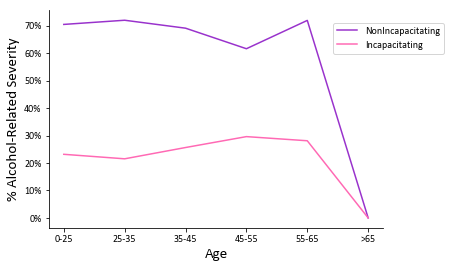

In [6]:
m1_t = pd.DataFrame({
 'Incapacitating' : INJSVR_AGE_SemiFinal_T_PERCENT.loc["A"].round(2),
 'NonIncapacitating' : INJSVR_AGE_SemiFinal_T_PERCENT.loc["B"].round(2)})

m1_t['NonIncapacitating'].plot(color="darkorchid",stacked=False,rot=0)
m1_t['Incapacitating'].plot(color="hotpink",stacked=False,rot=0)

ax = plt.gca()
plt.xticks(np.arange(6),('0-25', '25-35', '35-45', '45-55', '55-65', '>65'))
ax.set_xlabel("Age",fontsize=15)
ax.set_ylabel("% Alcohol-Related Severity",fontsize=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fmt='%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)

my_y_ticks = np.arange(0,80, 10)
plt.yticks(my_y_ticks)

#ax.set_title(" % Alcohol-Related Severity Distribution by Age")

ax.legend(loc=[0.85,0.8],fontsize=10)
fig = matplotlib.pyplot.gcf()
ax.get_figure().savefig("AgeSA.eps", bbox_inches="tight")

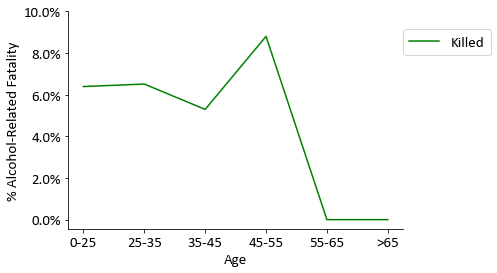

In [7]:
m1_t = pd.DataFrame({'Killed' : (INJSVR_AGE_SemiFinal_T_PERCENT.loc["K"].round(4))})
m1_t['Killed'].plot(color="green",stacked=False,fontsize=15,rot=0)

ax = plt.gca()
plt.xticks(np.arange(6),('0-25', '25-35', '35-45', '45-55', '55-65', '>65'))
ax.set_xlabel("Age",fontsize=15)
ax.set_ylabel("% Alcohol-Related Fatality",fontsize=15)
#ax.set_title(" % Alcohol-Related Fatality Distributed by Age")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fmt='%.1f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
my_y_ticks = np.arange(0,12,2)
plt.yticks(my_y_ticks)
ax.legend(loc=[1,0.8],fontsize=15)

fig = matplotlib.pyplot.gcf()
ax.get_figure().savefig("AgeSFA.eps", bbox_inches="tight")

In [8]:
INJSVR_AGE_SemiFinal_T_NA= SINJSVR_AGE_SemiFinal_T-INJSVR_AGE_SemiFinal_T
INJSVR_AGE_SemiFinal_T_NA

,0-25,25-35,35-45,45-55,55-65,>65
INJSVR,,,,,,
A,616,508,365,395,270,225
B,3931,3070,2225,1949,1408,1196
K,38,25,17,23,36,28


In [9]:
sum1 = INJSVR_AGE_SemiFinal_T_NA["0-25"].sum()
sum2 = INJSVR_AGE_SemiFinal_T_NA["25-35"].sum()
sum3 = INJSVR_AGE_SemiFinal_T_NA["35-45"].sum()
sum4 = INJSVR_AGE_SemiFinal_T_NA["45-55"].sum()
sum5 = INJSVR_AGE_SemiFinal_T_NA["55-65"].sum()
sum6 = INJSVR_AGE_SemiFinal_T_NA[">65"].sum()

INJSVR_AGE_SemiFinal_T_NA_SUM = INJSVR_AGE_SemiFinal_T_NA.replace([INJSVR_AGE_SemiFinal_T_NA["0-25"]["A"],INJSVR_AGE_SemiFinal_T_NA["0-25"]["B"],INJSVR_AGE_SemiFinal_T_NA["0-25"]["K"],INJSVR_AGE_SemiFinal_T_NA["25-35"]["A"], INJSVR_AGE_SemiFinal_T_NA["25-35"]["B"],INJSVR_AGE_SemiFinal_T_NA["25-35"]["K"],INJSVR_AGE_SemiFinal_T_NA["35-45"]["A"],INJSVR_AGE_SemiFinal_T_NA["35-45"]["B"],INJSVR_AGE_SemiFinal_T_NA["35-45"]["K"],INJSVR_AGE_SemiFinal_T_NA["45-55"]["A"],INJSVR_AGE_SemiFinal_T_NA["45-55"]["B"],INJSVR_AGE_SemiFinal_T_NA["45-55"]["K"],INJSVR_AGE_SemiFinal_T_NA["55-65"]["A"],INJSVR_AGE_SemiFinal_T_NA["55-65"]["B"],INJSVR_AGE_SemiFinal_T_NA["55-65"]["K"],INJSVR_AGE_SemiFinal_T_NA[">65"]["A"],INJSVR_AGE_SemiFinal_T_NA[">65"]["B"],INJSVR_AGE_SemiFinal_T_NA[">65"]["K"]], 
                               [sum1, sum1, sum1, sum2, sum2, sum2, sum3, sum3, sum3, sum4, sum4, sum4, sum5, sum5, sum5, sum6, sum6, sum6])

INJSVR_AGE_SemiFinal_T_NA_SUM["25-35"]["K"]=399.0
INJSVR_AGE_SemiFinal_T_NA_SUM["35-45"]["K"]=199.0
INJSVR_AGE_SemiFinal_T_NA_SUM

,0-25,25-35,35-45,45-55,55-65,>65
INJSVR,,,,,,
A,4585,3603,2607,2367,1714,1449
B,4585,3603,2607,2367,1714,1449
K,4585,399,199,2367,1714,1449


In [10]:
INJSVR_AGE_SemiFinal_T_NA_PERCENT = INJSVR_AGE_SemiFinal_T_NA*100/INJSVR_AGE_SemiFinal_T_NA_SUM
INJSVR_AGE_SemiFinal_T_NA_PERCENT.round(2)

,0-25,25-35,35-45,45-55,55-65,>65
INJSVR,,,,,,
A,13.44,14.10,14.00,16.69,15.75,15.53
B,85.74,85.21,85.35,82.34,82.15,82.54
K,0.83,6.27,8.54,0.97,2.10,1.93


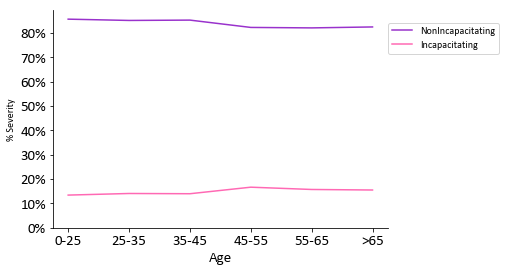

In [11]:
m1_t = pd.DataFrame({
 'Incapacitating':INJSVR_AGE_SemiFinal_T_NA_PERCENT.loc["A"].round(2),
 'NonIncapacitating':INJSVR_AGE_SemiFinal_T_NA_PERCENT.loc["B"].round(2)})
m1_t['NonIncapacitating'].plot(color="darkorchid",stacked=False,fontsize=15,rot=0)
m1_t['Incapacitating'].plot(color="hotpink",stacked=False,fontsize=15,rot=0)

ax = plt.gca()
plt.xticks(np.arange(6),('0-25', '25-35', '35-45', '45-55', '55-65', '>65'))
ax.set_xlabel("Age",fontsize=15)
ax.set_ylabel("% Severity",fontsize=10)
#ax.set_title("% Severity Distribution by Age")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fmt='%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
my_y_ticks = np.arange(0,90, 10)
plt.yticks(my_y_ticks)
ax.legend(loc=[1,0.8],fontsize=10)

fig = matplotlib.pyplot.gcf()
ax.get_figure().savefig("AgeS.eps", bbox_inches="tight")

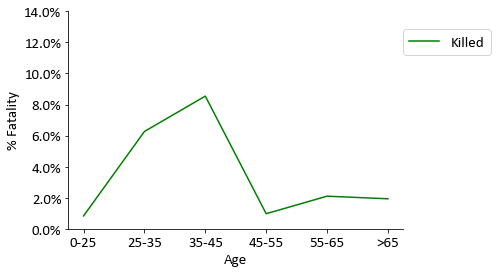

In [12]:
m1_t = pd.DataFrame({'Killed' : (INJSVR_AGE_SemiFinal_T_NA_PERCENT.loc["K"].round(4))})
m1_t['Killed'].plot(color="green",stacked=False,fontsize=15,rot=0)

ax = plt.gca()
plt.xticks(np.arange(6),('0-25', '25-35', '35-45', '45-55', '55-65', '>65'))
ax.set_xlabel("Age",fontsize=15)
ax.set_ylabel("% Fatality",fontsize=15)
#ax.set_title(" % Fatality Distributed by Age")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fmt='%.1f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
my_y_ticks = np.arange(0,15,2)
plt.yticks(my_y_ticks)
ax.legend(loc=[1,0.8],fontsize=15)

fig = matplotlib.pyplot.gcf()
ax.get_figure().savefig("AgeSF.eps", bbox_inches="tight")

In [13]:
def qry(sql,a):
    return pd.read_sql(sql,a)

In [14]:
con6=qry("""
SELECT "NTFYHOUR",count() as Total,count("ALCFLAG") as ALC,"DOCTNMBR" as "Ratio"
FROM crash
GROUP BY "NTFYHOUR"
""",conn)

for i in range(24):
    con6["Ratio"][i]=(con6["ALC"][i]/con6["Total"][i])*100

con6["Ratio"][24]=0

df1=pd.read_csv("Suburb.csv")
df1.head()

conn1 = sqlite3.connect('df1.db')
df1.to_sql("df1", conn1, if_exists="replace", index=False)

con7=qry("""
SELECT "NTFYHOUR",count() as Total,count("ALCFLAG") as ALC,"DOCTNMBR" as "Ratio"
FROM df1
GROUP BY "NTFYHOUR"
""",conn1)

for i in range(24):
    con7["Ratio"][i]=(con7["ALC"][i]/con7["Total"][i])*100

con7["Ratio"][24]=0

d:\搜狗高速下载\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
d:\搜狗高速下载\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
d:\搜狗高速下载\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (11,35,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
d:\搜狗高速下载\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

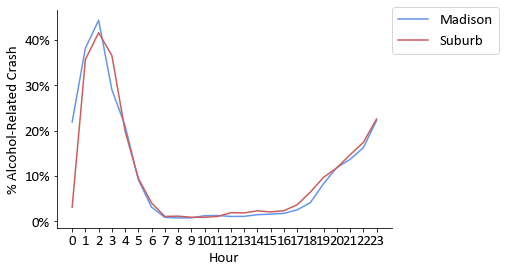

In [15]:
m1_t = pd.DataFrame({
  'Madison':con6["Ratio"][0:24],
 'Suburb':con7["Ratio"][0:24]})
m1_t['Madison'].plot(color="cornflowerblue",stacked=False,fontsize=15,rot=0)
m1_t['Suburb'].plot(color="Indianred",stacked=False,fontsize=15,rot=0)

ax = plt.gca()
plt.xticks(np.arange(24),('0', '1', '2', '3', '4', '5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23'))
ax.set_xlabel("Hour",fontsize=15)
ax.set_ylabel("% Alcohol-Related Crash",fontsize=15)
#ax.set_title("% Alcohol-Related Crash Distributed by Hour")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fmt='%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
my_y_ticks = np.arange(0,50, 10)
plt.yticks(my_y_ticks)

ax.legend(loc=[1,0.8],fontsize=15)
fig = matplotlib.pyplot.gcf()
ax.get_figure().savefig("HourA.eps", bbox_inches="tight")

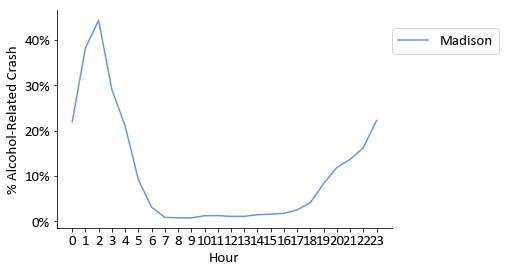

In [16]:
m1_t = pd.DataFrame({
  'Madison':con6["Ratio"][0:24]})
m1_t['Madison'].plot(color="cornflowerblue",stacked=False,fontsize=15,rot=0)

ax = plt.gca()
plt.xticks(np.arange(24),('0', '1', '2', '3', '4', '5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23'))
ax.set_xlabel("Hour",fontsize=15)
ax.set_ylabel("% Alcohol-Related Crash",fontsize=15)
#ax.set_title("% Alcohol-Related Crash Distributed by Hour")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fmt='%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
my_y_ticks = np.arange(0,50, 10)
plt.yticks(my_y_ticks)

ax.legend(loc=[1,0.8],fontsize=15)
fig = matplotlib.pyplot.gcf()
ax.get_figure().savefig("HourAMM.eps", bbox_inches="tight")

In [17]:
con8=qry("""
SELECT "WEEK",count() as Total,count("ALCFLAG") as ALC,"DOCTNMBR" as "Ratio"
FROM crash
GROUP BY "WEEK"
""",conn)

con9=qry("""
SELECT "WEEK",count() as Total,count("ALCFLAG") as ALC,"DOCTNMBR" as "Ratio"
FROM df1
GROUP BY "WEEK"
""",conn1)

con8["Ratio"][0]=(con8["ALC"][1]/con8["Total"][1])*100
con9["Ratio"][0]=(con8["ALC"][1]/con8["Total"][1])*100

for i in range(6):
    con8["Ratio"][i+1]=(con8["ALC"][i+1]/con8["Total"][i+1])*100

for i in range(6):
    con9["Ratio"][i+1]=(con9["ALC"][i+1]/con9["Total"][i+1])*100

d:\搜狗高速下载\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
d:\搜狗高速下载\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
d:\搜狗高速下载\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
d:\搜狗高速下载\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

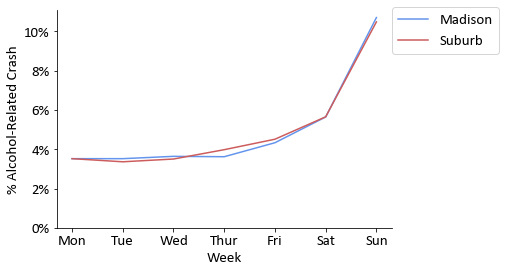

In [18]:
m1_t = pd.DataFrame({
 'Madison':con8["Ratio"],
 'Suburb':con9["Ratio"]})
m1_t['Madison'].plot(color="cornflowerblue",stacked=False,fontsize=15,rot=0)
m1_t['Suburb'].plot(color="Indianred",stacked=False,fontsize=15,rot=0)

ax = plt.gca()
plt.xticks(np.arange(7),('Mon','Tue','Wed','Thur','Fri','Sat','Sun'))
ax.set_xlabel("Week",fontsize=15)
ax.set_ylabel("% Alcohol-Related Crash",fontsize=15)
#ax.set_title("% Alcohol-Related Crash Distributed by Week")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fmt='%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)

my_y_ticks = np.arange(0,11, 2)
plt.yticks(my_y_ticks)

ax.legend(loc=[1,0.8],fontsize=15)
fig = matplotlib.pyplot.gcf()
ax.get_figure().savefig("WeekA.eps", bbox_inches="tight")

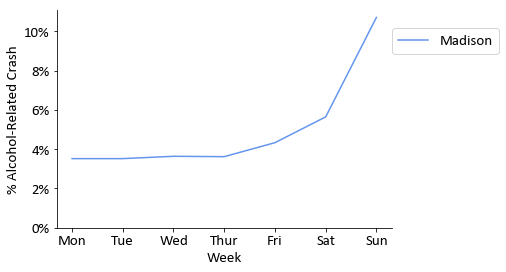

In [19]:
m1_t = pd.DataFrame({
 'Madison':con8["Ratio"]})
m1_t['Madison'].plot(color="cornflowerblue",stacked=False,fontsize=15,rot=0)

ax = plt.gca()
plt.xticks(np.arange(7),('Mon','Tue','Wed','Thur','Fri','Sat','Sun'))
ax.set_xlabel("Week",fontsize=15)
ax.set_ylabel("% Alcohol-Related Crash",fontsize=15)
#ax.set_title("% Alcohol-Related Crash Distributed by Week")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fmt='%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)

my_y_ticks = np.arange(0,11, 2)
plt.yticks(my_y_ticks)

ax.legend(loc=[1,0.8],fontsize=15)
fig = matplotlib.pyplot.gcf()
ax.get_figure().savefig("WeekAM.eps", bbox_inches="tight")

In [20]:
con10=qry("""
SELECT "MONTH",count() as Total,count("ALCFLAG") as ALC,"DOCTNMBR" as "Ratio"
FROM crash 
GROUP BY "MONTH"
""",conn)

con11=qry("""
SELECT "MONTH",count() as Total,count("ALCFLAG") as ALC,"DOCTNMBR" as "Ratio"
FROM df1
GROUP BY "MONTH"
""",conn1)

for i in range(12):
    con10["Ratio"][i]=(con10["ALC"][i]/con10["Total"][i])*100

for i in range(12):
    con11["Ratio"][i]=(con11["ALC"][i]/con11["Total"][i])*100


d:\搜狗高速下载\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
d:\搜狗高速下载\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


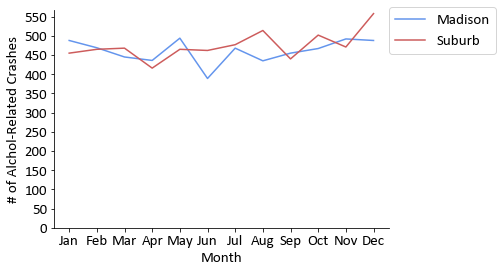

In [21]:
m1_t = pd.DataFrame({
 'Madison' : con10["ALC"],
 'Suburb' : con11["ALC"]})
m1_t['Madison'].plot(color="cornflowerblue",stacked=False,fontsize=15,rot=0)
m1_t['Suburb'].plot(color="Indianred",stacked=False,fontsize=15,rot=0)

ax = plt.gca()
plt.xticks(np.arange(12),('Jan', 'Feb', 'Mar', 'Apr', 'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))
ax.set_xlabel("Month",fontsize=15)
ax.set_ylabel("# of Alchol-Related Crashes",fontsize=15)
#ax.set_title("# of Alchol-Related Crashes by Month")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

my_y_ticks = np.arange(0,600,50)
plt.yticks(my_y_ticks)
ax.legend(loc=[1,0.8],fontsize=15)
    
fig = matplotlib.pyplot.gcf()
ax.get_figure().savefig("MonthAN.eps", bbox_inches="tight")

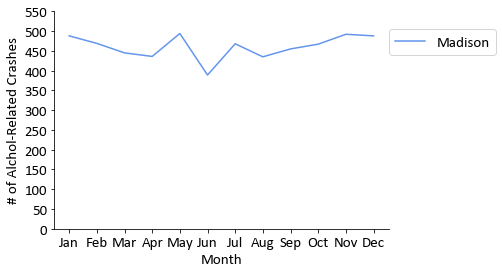

In [22]:
m1_t = pd.DataFrame({
 'Madison' : con10["ALC"]})
m1_t['Madison'].plot(color="cornflowerblue",stacked=False,fontsize=15,rot=0)

ax = plt.gca()
plt.xticks(np.arange(12),('Jan', 'Feb', 'Mar', 'Apr', 'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))
ax.set_xlabel("Month",fontsize=15)
ax.set_ylabel("# of Alchol-Related Crashes",fontsize=15)
#ax.set_title("# of Alchol-Related Crashes by Month")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

my_y_ticks = np.arange(0,600,50)
plt.yticks(my_y_ticks)
ax.legend(loc=[1,0.8],fontsize=15)
    
fig = matplotlib.pyplot.gcf()
ax.get_figure().savefig("MonthANM.eps", bbox_inches="tight")

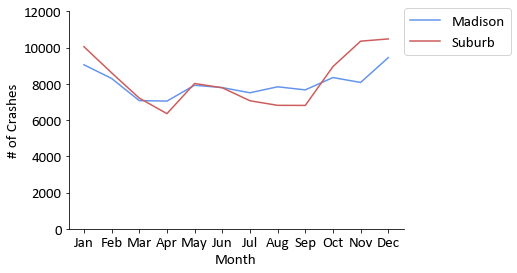

In [23]:
m1_t = pd.DataFrame({
 'Madison' : con10["Total"],
 'Suburb' : con11["Total"]})
m1_t['Madison'].plot(color="cornflowerblue",stacked=False,fontsize=15,rot=0)
m1_t['Suburb'].plot(color="Indianred",stacked=False,fontsize=15,rot=0)

ax = plt.gca()
plt.xticks(np.arange(12),('Jan', 'Feb', 'Mar', 'Apr', 'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))
ax.set_xlabel("Month",fontsize=15)
ax.set_ylabel("# of Crashes",fontsize=15)
#ax.set_title("# of Crashes by Month")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

my_y_ticks = np.arange(0,13000,2000)
plt.yticks(my_y_ticks)
ax.legend(loc=[1,0.8],fontsize=15)
    
fig = matplotlib.pyplot.gcf()
ax.get_figure().savefig("Month.eps", bbox_inches="tight")

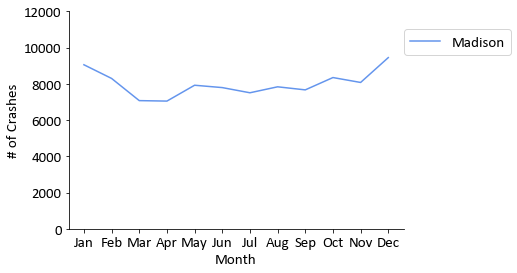

In [24]:
m1_t = pd.DataFrame({
 'Madison' : con10["Total"]})
m1_t['Madison'].plot(color="cornflowerblue",stacked=False,fontsize=15,rot=0)

ax = plt.gca()
plt.xticks(np.arange(12),('Jan', 'Feb', 'Mar', 'Apr', 'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))
ax.set_xlabel("Month",fontsize=15)
ax.set_ylabel("# of Crashes",fontsize=15)
#ax.set_title("# of Crashes by Month")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

my_y_ticks = np.arange(0,13000,2000)
plt.yticks(my_y_ticks)
ax.legend(loc=[1,0.8],fontsize=15)
    
fig = matplotlib.pyplot.gcf()
ax.get_figure().savefig("MonthM.eps", bbox_inches="tight")

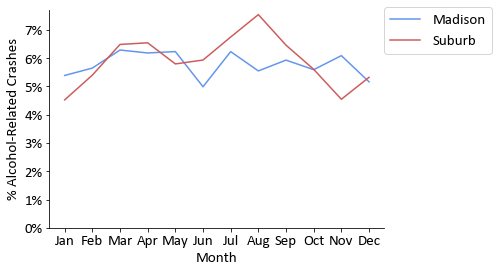

In [25]:
m1_t = pd.DataFrame({
 'Madison' : con10["Ratio"],
 'Suburb' : con11["Ratio"]})
m1_t['Madison'].plot(color="cornflowerblue",stacked=False,fontsize=15,rot=0)
m1_t['Suburb'].plot(color="Indianred",stacked=False,fontsize=15,rot=0)

ax = plt.gca()
plt.xticks(np.arange(12),('Jan', 'Feb', 'Mar', 'Apr', 'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))
ax.set_xlabel("Month",fontsize=15)
ax.set_ylabel("% Alcohol-Related Crashes",fontsize=15)
#ax.set_title("% Alcohol-Related Crash Distribution by Month")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fmt='%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
my_y_ticks = np.arange(0,8,1)
plt.yticks(my_y_ticks)
ax.legend(loc=[1,0.8],fontsize=15)
    
fig = matplotlib.pyplot.gcf()
ax.get_figure().savefig("MonthA.eps", bbox_inches="tight")

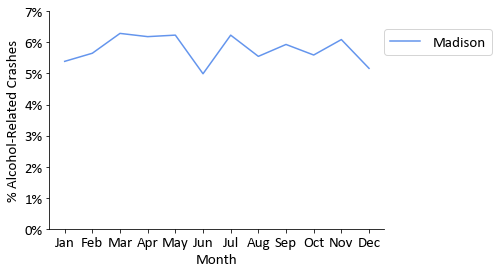

In [26]:
m1_t = pd.DataFrame({
 'Madison' : con10["Ratio"]})
m1_t['Madison'].plot(color="cornflowerblue",stacked=False,fontsize=15,rot=0)

ax = plt.gca()
plt.xticks(np.arange(12),('Jan', 'Feb', 'Mar', 'Apr', 'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))
ax.set_xlabel("Month",fontsize=15)
ax.set_ylabel("% Alcohol-Related Crashes",fontsize=15)
#ax.set_title("% Alcohol-Related Crash Distribution by Month")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fmt='%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
my_y_ticks = np.arange(0,8,1)
plt.yticks(my_y_ticks)
ax.legend(loc=[1,0.8],fontsize=15)
    
fig = matplotlib.pyplot.gcf()
ax.get_figure().savefig("MonthAM.eps", bbox_inches="tight")

In [27]:
con12=qry("""
SELECT "NTFYHOUR",count() as Total,count("ALCFLAG") as ALC,"DOCTNMBR" as "Ratio"
FROM crash
WHERE "Week"=2
GROUP BY "NTFYHOUR"
""",conn)

for i in range(24):
    con12["Ratio"][i]=(con12["ALC"][i]/con12["Total"][i])*100

con13=qry("""
SELECT "NTFYHOUR",count() as Total,count("ALCFLAG") as ALC,"DOCTNMBR" as "Ratio"
FROM crash
WHERE "Week"=3
GROUP BY "NTFYHOUR"
""",conn)

for i in range(24):
    con13["Ratio"][i]=(con13["ALC"][i]/con13["Total"][i])*100

con14=qry("""
SELECT "NTFYHOUR",count() as Total,count("ALCFLAG") as ALC,"DOCTNMBR" as "Ratio"
FROM crash
WHERE "Week"=4
GROUP BY "NTFYHOUR"
""",conn)

for i in range(24):
    con14["Ratio"][i]=(con14["ALC"][i]/con14["Total"][i])*100

con15=qry("""
SELECT "NTFYHOUR",count() as Total,count("ALCFLAG") as ALC,"DOCTNMBR" as "Ratio"
FROM crash
WHERE "Week"=5
GROUP BY "NTFYHOUR"
""",conn)

for i in range(24):
    con15["Ratio"][i]=(con15["ALC"][i]/con15["Total"][i])*100

con16=qry("""
SELECT "NTFYHOUR",count() as Total,count("ALCFLAG") as ALC,"DOCTNMBR" as "Ratio"
FROM crash
WHERE "Week"=6
GROUP BY "NTFYHOUR"
""",conn)

for i in range(24):
    con16["Ratio"][i]=(con16["ALC"][i]/con16["Total"][i])*100

con17=qry("""
SELECT "NTFYHOUR",count() as Total,count("ALCFLAG") as ALC,"DOCTNMBR" as "Ratio"
FROM crash
WHERE "Week"=7
GROUP BY "NTFYHOUR"
""",conn)

for i in range(24):
    con17["Ratio"][i]=(con17["ALC"][i]/con17["Total"][i])*100

con18=qry("""
SELECT "NTFYHOUR",count() as Total,count("ALCFLAG") as ALC,"DOCTNMBR" as "Ratio"
FROM crash
WHERE "Week"=1
GROUP BY "NTFYHOUR"
""",conn)

for i in range(24):
     con18["Ratio"][i]=(con18["ALC"][i]/con18["Total"][i])*100
        

d:\搜狗高速下载\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
d:\搜狗高速下载\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
d:\搜狗高速下载\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
d:\搜狗高速下载\lib\site-packages\ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the

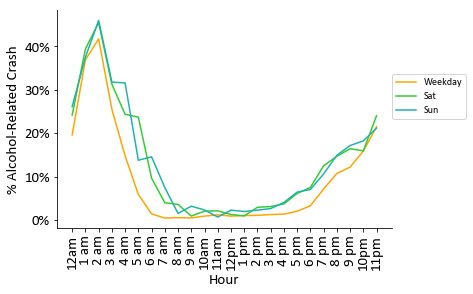

In [28]:
m1_t = pd.DataFrame({
 'Weekday' : (con12["Ratio"][0:24]+con13["Ratio"][0:24]+con14["Ratio"][0:24]+con15["Ratio"][0:24]+con16["Ratio"][0:24])/5,
 'Sat':con17["Ratio"][0:24],
 'Sun':con18["Ratio"][0:24]})

m1_t['Weekday'].plot(color="orange",stacked=False,fontsize=15,rot=90)
m1_t['Sat'].plot(color="limegreen",stacked=False,fontsize=15,rot=90)
m1_t['Sun'].plot(color="lightseagreen",stacked=False,fontsize=15,rot=90)

ax = plt.gca()
plt.xticks(np.arange(24),("12am", "1 am", "2 am", "3 am", "4 am", "5 am","6 am","7 am","8 am","9 am","10am","11am","12pm","1 pm","2 pm","3 pm","4 pm","5 pm","6 pm","7 pm","8 pm","9 pm","10pm","11pm"))
ax.set_xlabel("Hour",fontsize=15)
ax.set_ylabel("% Alcohol-Related Crash",fontsize=15)
#ax.set_title("% Weekly Alcohol-Related Crash Distributed by Hour in Madison")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fmt='%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)

my_y_ticks = np.arange(0,50, 10)
plt.yticks(my_y_ticks)
ax.legend(loc=[1,0.5])

fig = matplotlib.pyplot.gcf()
ax.get_figure().savefig("HourAM.eps", bbox_inches="tight")

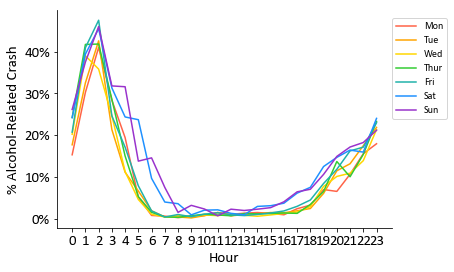

In [29]:
m1_t = pd.DataFrame({
 'Mon' : con12["Ratio"][0:24],
 'Tue' : con13["Ratio"][0:24],
 'Wed':con14["Ratio"][0:24],
 'Thur':con15["Ratio"][0:24],
 'Fri':con16["Ratio"][0:24],
 'Sat':con17["Ratio"][0:24],
 'Sun':con18["Ratio"][0:24]})

m1_t['Mon'].plot(color="tomato",stacked=False,fontsize=15,rot=0)
m1_t['Tue'].plot(color="orange",stacked=False,fontsize=15,rot=0)
m1_t['Wed'].plot(color="gold",stacked=False,fontsize=15,rot=0)
m1_t['Thur'].plot(color="limegreen",stacked=False,fontsize=15,rot=0)
m1_t['Fri'].plot(color="lightseagreen",stacked=False,fontsize=15,rot=0)
m1_t['Sat'].plot(color="dodgerblue",stacked=False,fontsize=15,rot=0)
m1_t['Sun'].plot(color="darkorchid",stacked=False,fontsize=15,rot=0)

ax = plt.gca()
plt.xticks(np.arange(24),(0, 1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23))
ax.set_xlabel("Hour",fontsize=15)
ax.set_ylabel("% Alcohol-Related Crash",fontsize=15)
#ax.set_title("% Weekly Alcohol-Related Crash Distributed by Hour in Madison")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fmt='%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)

my_y_ticks = np.arange(0,50, 10)
plt.yticks(my_y_ticks)
ax.legend(loc=[1,0.5])

fig = matplotlib.pyplot.gcf()
ax.get_figure().savefig("HourAMD.eps", bbox_inches="tight")

In [30]:
df1=pd.read_csv("Suburb.csv")
df1.head()

conn1 = sqlite3.connect('df1.db')
df1.to_sql("df1", conn1, if_exists="replace", index=False)

con19=qry("""
SELECT "NTFYHOUR",count() as Total,count("ALCFLAG") as ALC,"DOCTNMBR" as "Ratio"
FROM df1
WHERE "Week"=2
GROUP BY "NTFYHOUR"
""",conn1)

for i in range(24):
    con19["Ratio"][i]=(con19["ALC"][i]/con19["Total"][i])*100
    
    
con20=qry("""
SELECT "NTFYHOUR",count() as Total,count("ALCFLAG") as ALC,"DOCTNMBR" as "Ratio"
FROM df1
WHERE "Week"=3
GROUP BY "NTFYHOUR"
""",conn1)

for i in range(24):
    con20["Ratio"][i]=(con20["ALC"][i]/con20["Total"][i])*100
    
con21=qry("""
SELECT "NTFYHOUR",count() as Total,count("ALCFLAG") as ALC,"DOCTNMBR" as "Ratio"
FROM df1
WHERE "Week"=4
GROUP BY "NTFYHOUR"
""",conn1)

for i in range(24):
    con21["Ratio"][i]=(con21["ALC"][i]/con21["Total"][i])*100
    
con22=qry("""
SELECT "NTFYHOUR",count() as Total,count("ALCFLAG") as ALC,"DOCTNMBR" as "Ratio"
FROM df1
WHERE "Week"=5
GROUP BY "NTFYHOUR"
""",conn1)

for i in range(24):
    con22["Ratio"][i]=(con22["ALC"][i]/con22["Total"][i])*100

con23=qry("""
SELECT "NTFYHOUR",count() as Total,count("ALCFLAG") as ALC,"DOCTNMBR" as "Ratio"
FROM df1
WHERE "Week"=6
GROUP BY "NTFYHOUR"
""",conn1)

for i in range(24):
    con23["Ratio"][i]=(con23["ALC"][i]/con23["Total"][i])*100
    
con24=qry("""
SELECT "NTFYHOUR",count() as Total,count("ALCFLAG") as ALC,"DOCTNMBR" as "Ratio"
FROM df1
WHERE "Week"=7
GROUP BY "NTFYHOUR"
""",conn1)

for i in range(24):
    con24["Ratio"][i]=(con24["ALC"][i]/con24["Total"][i])*100

con25=qry("""
SELECT "NTFYHOUR",count() as Total,count("ALCFLAG") as ALC,"DOCTNMBR" as "Ratio"
FROM df1
WHERE "Week"=1
GROUP BY "NTFYHOUR"
""",conn1)

for i in range(24):
    con25["Ratio"][i]=(con25["ALC"][i]/con25["Total"][i])*100
    


con27=qry("""
SELECT "NTFYHOUR",count() as Total,count("ALCFLAG") as ALC,"MUNICIPALITY"
FROM crash
WHERE "NTFYHOUR"=0
GROUP BY "MUNICIPALITY"
""",conn)

print(con27)


d:\搜狗高速下载\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (11,35,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
d:\搜狗高速下载\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
d:\搜狗高速下载\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
d:\搜狗高速下载\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: 

   NTFYHOUR  Total  ALC MUNICIPALITY
0         0   2073  454      MADISON


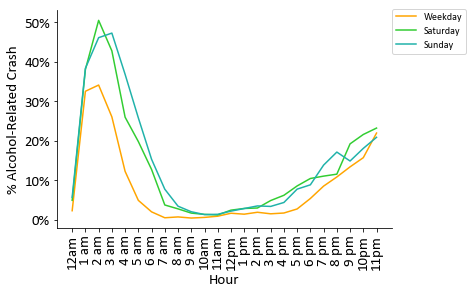

In [31]:
m1_t = pd.DataFrame({
 'Weekday' : (con19["Ratio"][0:24]+con20["Ratio"][0:24]+con21["Ratio"][0:24]+con22["Ratio"][0:24]+con23["Ratio"][0:24])/5,
 'Saturday':con24["Ratio"][0:24],
 'Sunday':con25["Ratio"][0:24]})

m1_t['Weekday'].plot(color="orange",stacked=False,fontsize=15,rot=90)
m1_t['Saturday'].plot(color="limegreen",stacked=False,fontsize=15,rot=90)
m1_t['Sunday'].plot(color="lightseagreen",stacked=False,fontsize=15,rot=90)

ax = plt.gca()
plt.xticks(np.arange(24),("12am", "1 am", "2 am", "3 am", "4 am", "5 am","6 am","7 am","8 am","9 am","10am","11am","12pm","1 pm","2 pm","3 pm","4 pm","5 pm","6 pm","7 pm","8 pm","9 pm","10pm","11pm"))
ax.set_xlabel("Hour",fontsize=15)
ax.set_ylabel("% Alcohol-Related Crash",fontsize=15)
#ax.set_title("% Weekly Alcohol-Related Crash Distributed by Hour in Suburb")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fmt='%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)

my_y_ticks = np.arange(0,60, 10)
plt.yticks(my_y_ticks)
ax.legend(loc=[1,0.8])

fig = matplotlib.pyplot.gcf()

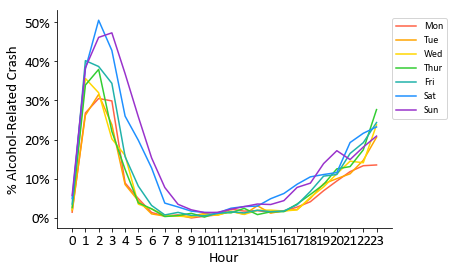

In [32]:
m1_t = pd.DataFrame({
 'Mon' : con19["Ratio"][0:24],
 'Tue' : con20["Ratio"][0:24],
 'Wed':con21["Ratio"][0:24],
 'Thur':con22["Ratio"][0:24],
 'Fri':con23["Ratio"][0:24],
 'Sat':con24["Ratio"][0:24],
 'Sun':con25["Ratio"][0:24]})

m1_t['Mon'].plot(color="tomato",stacked=False,fontsize=15,rot=0)
m1_t['Tue'].plot(color="orange",stacked=False,fontsize=15,rot=0)
m1_t['Wed'].plot(color="gold",stacked=False,fontsize=15,rot=0)
m1_t['Thur'].plot(color="limegreen",stacked=False,fontsize=15,rot=0)
m1_t['Fri'].plot(color="lightseagreen",stacked=False,fontsize=15,rot=0)
m1_t['Sat'].plot(color="dodgerblue",stacked=False,fontsize=15,rot=0)
m1_t['Sun'].plot(color="darkorchid",stacked=False,fontsize=15,rot=0)

ax = plt.gca()
plt.xticks(np.arange(24),(0, 1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23))
ax.set_xlabel("Hour",fontsize=15)
ax.set_ylabel("% Alcohol-Related Crash",fontsize=15)
#ax.set_title("% Weekly Alcohol-Related Crash Distributed by Hour in Surbub")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fmt='%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
my_y_ticks = np.arange(0,60, 10)
plt.yticks(my_y_ticks)

ax.legend(loc=[1,0.5])
fig = matplotlib.pyplot.gcf()

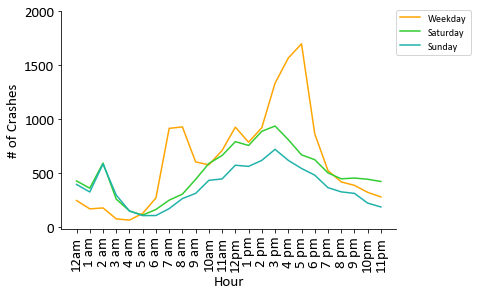

In [33]:
m1_t = pd.DataFrame({
 'Weekday' : (con12["Total"][0:24]+con13["Total"][0:24]+con14["Total"][0:24]+con15["Total"][0:24]+con16["Total"][0:24])/5,
 'Saturday':con17["Total"][0:24],
 'Sunday':con18["Total"][0:24]})

m1_t['Weekday'].plot(color="orange",stacked=False,fontsize=15,rot=90)
m1_t['Saturday'].plot(color="limegreen",stacked=False,fontsize=15,rot=90)
m1_t['Sunday'].plot(color="lightseagreen",stacked=False,fontsize=15,rot=90)

ax = plt.gca()
plt.xticks(np.arange(24),("12am", "1 am", "2 am", "3 am", "4 am", "5 am","6 am","7 am","8 am","9 am","10am","11am","12pm","1 pm","2 pm","3 pm","4 pm","5 pm","6 pm","7 pm","8 pm","9 pm","10pm","11pm"))
ax.set_xlabel("Hour",fontsize=15)
ax.set_ylabel("# of Crashes",fontsize=15)
#ax.set_title("# of Weekly Crash Distributed by Hour in Madison")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

my_y_ticks = np.arange(0,2100, 500)
plt.yticks(my_y_ticks)
my_x_ticks = np.arange(0,24, 1)
plt.xticks(my_x_ticks)
ax.legend(loc=[1,0.8])

fig = matplotlib.pyplot.gcf()
ax.get_figure().savefig("HourNM.eps", bbox_inches="tight")

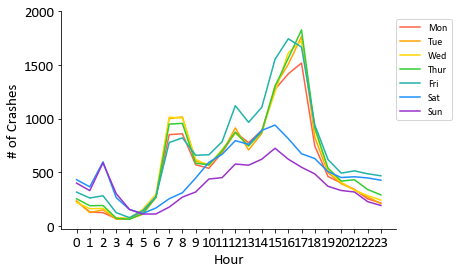

In [38]:
m1_t = pd.DataFrame({
 'Mon' : con12["Total"][0:24],
 'Tue' : con13["Total"][0:24],
 'Wed':con14["Total"][0:24],
 'Thur':con15["Total"][0:24],
 'Fri':con16["Total"][0:24],
 'Sat':con17["Total"][0:24],
 'Sun':con18["Total"][0:24]})
m1_t['Mon'].plot(color="tomato",stacked=False,fontsize=15,rot=0)
m1_t['Tue'].plot(color="orange",stacked=False,fontsize=15,rot=0)
m1_t['Wed'].plot(color="gold",stacked=False,fontsize=15,rot=0)
m1_t['Thur'].plot(color="limegreen",stacked=False,fontsize=15,rot=0)
m1_t['Fri'].plot(color="lightseagreen",stacked=False,fontsize=15,rot=0)
m1_t['Sat'].plot(color="dodgerblue",stacked=False,fontsize=15,rot=0)
m1_t['Sun'].plot(color="darkorchid",stacked=False,fontsize=15,rot=0)

ax = plt.gca()
plt.xticks(np.arange(24),(0, 1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23))
ax.set_xlabel("Hour",fontsize=15)
ax.set_ylabel("# of Crashes",fontsize=15)
#ax.set_title("# of Weekly Crash Distributed by Hour in Madison")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

my_y_ticks = np.arange(0,2100, 500)
plt.yticks(my_y_ticks)
my_x_ticks = np.arange(0,24, 1)
plt.xticks(my_x_ticks)
ax.legend(loc=[1,0.5])

fig = matplotlib.pyplot.gcf()
ax.get_figure().savefig("HourNMD.eps", bbox_inches="tight")

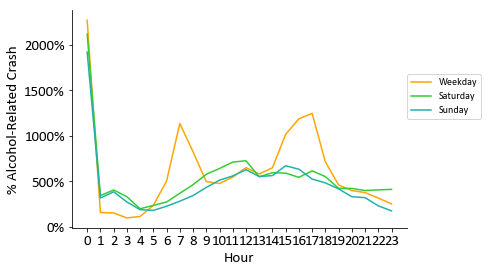

In [35]:
m1_t = pd.DataFrame({
 'Weekday' : (con19["Total"][0:24]+con20["Total"][0:24]+con21["Total"][0:24]+con22["Total"][0:24]+con23["Total"][0:24])/5,
 'Saturday':con24["Total"][0:24],
 'Sunday':con25["Total"][0:24]})

m1_t['Weekday'].plot(color="orange",stacked=False,fontsize=15,rot=0)
m1_t['Saturday'].plot(color="limegreen",stacked=False,fontsize=15,rot=0)
m1_t['Sunday'].plot(color="lightseagreen",stacked=False,fontsize=15,rot=0)

ax = plt.gca()
plt.xticks(np.arange(24),(0, 1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23))
ax.set_xlabel("Hour",fontsize=15)
ax.set_ylabel("% Alcohol-Related Crash",fontsize=15)
#ax.set_title("% Weekly Alcohol-Related Crash Distributed by Hour in Suburb")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fmt='%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)

my_y_ticks = np.arange(0,2100, 500)
plt.yticks(my_y_ticks)
my_x_ticks = np.arange(0,24, 1)
plt.xticks(my_x_ticks)
ax.legend(loc=[1,0.5])

fig = matplotlib.pyplot.gcf()

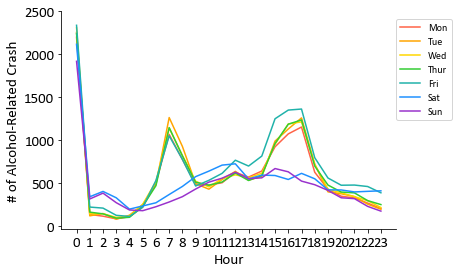

In [36]:
m1_t = pd.DataFrame({
 'Mon' : con19["Total"][0:24],
 'Tue' : con20["Total"][0:24],
 'Wed':con21["Total"][0:24],
 'Thur':con22["Total"][0:24],
 'Fri':con23["Total"][0:24],
 'Sat':con24["Total"][0:24],
 'Sun':con25["Total"][0:24]})

m1_t['Mon'].plot(color="tomato",stacked=False,fontsize=15,rot=0)
m1_t['Tue'].plot(color="orange",stacked=False,fontsize=15,rot=0)
m1_t['Wed'].plot(color="gold",stacked=False,fontsize=15,rot=0)
m1_t['Thur'].plot(color="limegreen",stacked=False,fontsize=15,rot=0)
m1_t['Fri'].plot(color="lightseagreen",stacked=False,fontsize=15,rot=0)
m1_t['Sat'].plot(color="dodgerblue",stacked=False,fontsize=15,rot=0)
m1_t['Sun'].plot(color="darkorchid",stacked=False,fontsize=15,rot=0)


ax = plt.gca()
plt.xticks(np.arange(24),(0, 1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23))
ax.set_xlabel("Hour",fontsize=15)
ax.set_ylabel("# of Alcohol-Related Crash",fontsize=15)
#ax.set_title("# of Alcohol-Related Crash Distributed by Hour in Surbub")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

my_y_ticks = np.arange(0,2600, 500)
plt.yticks(my_y_ticks)
my_x_ticks = np.arange(0,24, 1)
plt.xticks(my_x_ticks)
ax.legend(loc=[1,0.5])

fig = matplotlib.pyplot.gcf()

In [37]:
con29=qry("""
SELECT "NTFYHOUR",count() as Total,count("ALCFLAG") as ALC,"MUNICIPALITY"
FROM df1
WHERE "NTFYHOUR"=0
GROUP BY "MUNICIPALITY"
""",conn1)